# GEOS 518: Jupyter Notebook Assignment #1

## Taylor Dudunake
Due: 07/02/18

> **Instructions:** In this Jupyter notebook, you will should perform the following tasks with your chosen dataset:
1. Import it and create a plot
2. Compute and show key descriptive statistics about the time series that might include the mean, variance, and/or histograms
3. Assess the stationarity of the time series in one or both of the following ways: (1) compute and report the slope of a regression line through time (and it's significance), (2) compute and report the [Augmented Dickey-Fuller test](https://machinelearningmastery.com/time-series-data-stationary-python/)
4. Compute and plot the autocorrelation function of the time series. Note that if your examination reveals that the time series likely has a significant trend through time, you should either attempt to detrend it, or discuss the ramifications of not doing so at length.
5. Discuss in detail the results of your analyses in terms of the physical reasons that you observe the trends you see. For example, can you explain why the autocorrelation function behaves as you observe it to based on physical intuition?

> Characteristics of exemplary work:
* You use available libraries and (in comments) justify their use
* Your code is well commented and you describe each step that you are doing in your code
* Your plots are adequately sized. Axes, plots and legends labeled with font sizes that are readable. The marker and line styles and sizes are appropriate
* You use Markdown cells to describe, in detail what each code cell is doing. Markdown cells and code cells are adequately
* Your notebook response contains a Markdown cell that provides an overview of the problem statement, your approach, and key findings (i.e., these three things should correspond to sections)

## Task 1.1 Import relevant libraries and load the data into a usable format

In [1]:
# This library is required for data management tasks
import pandas as pd

# This library is required for computation tasks useful for this analysis
import numpy as np 

# This library is required for all things plotting
import matplotlib.pyplot as plt 

# This specific Pandas ibrary generates an autocorrelation plot
from pandas.plotting import autocorrelation_plot

# Import using pandas function for reading a csv file. It's also important to view and
# inspect the data to ensure everything is properly formatted. In this case, I look at
# the first and last 10 discharge measurememnts for this period of record (WY 2001-2017)
df = pd.read_csv('MF_Boise_cfs.csv', names=['Y','M','D','Q'], skiprows=1)
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

# This line of code reformats the original date and time to be readable in the following 
# functions.
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d')

# Here's what the first and last 10 records of the modified dataframe looks like
df.iloc[qrows,:]

,Y,M,D,Q,SerDates
0,2000,10,1,307,2000-10-01
1,2000,10,2,320,2000-10-02
2,2000,10,3,311,2000-10-03
3,2000,10,4,310,2000-10-04
4,2000,10,5,309,2000-10-05
5,2000,10,6,310,2000-10-06
6,2000,10,7,310,2000-10-07
7,2000,10,8,308,2000-10-08
8,2000,10,9,306,2000-10-09
9,2000,10,10,312,2000-10-10


## Task 1.2 Plot time series data

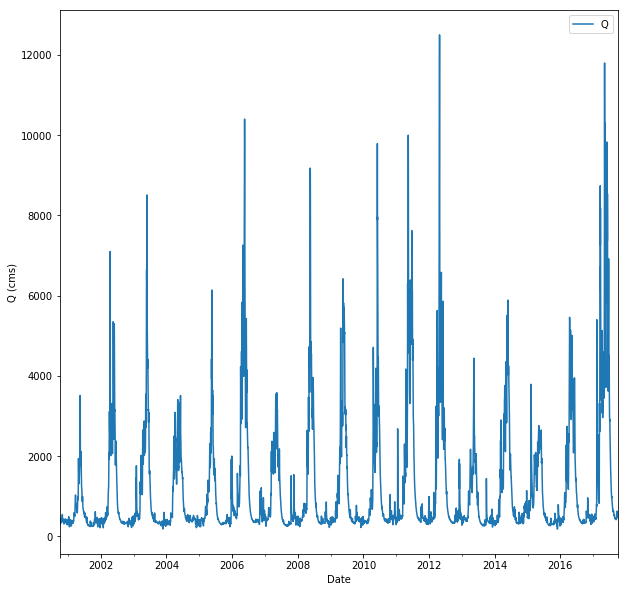

In [2]:
# Use the pandas plotting function, specifying 'SerDates' (the serial datas) on the x axis and 'Q' (discharge)
# on the y axis. I'm also using the 'figsize' option to increase the size of the plotted image
df.plot(x='SerDates', y='Q',figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Q (cms)')
plt.show()

## Task 2.1 Compute and examine key descriptive statistics

In [18]:
# First I use the "describe" function to obtain basic descriptive statistics for my time series
# data. These statistics include mean, standard deviation, minimum, 25%, 50%, and 75% quartile,
# as well as maximum. This function can be found in the Pandas library.
df.Q.describe()

count     6209.000000
mean      1175.351103
std       1433.500744
min        180.000000
25%        374.000000
50%        498.000000
75%       1430.000000
max      12500.000000
Name: Q, dtype: float64

In [20]:
# Next, I calculate the variance of all discharge data using a Pandas variance function
df.Q.var()

2054924.3828278019

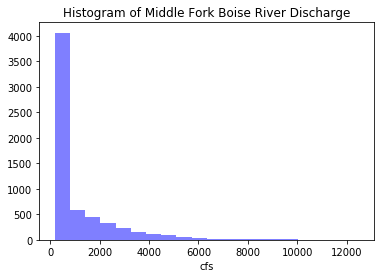

In [16]:
# Next, We can plot the data using a histogram to examine how the data is distributed through
# time. This plot can be created using the Matplotlib library
x = df.Q
n, bins, patches = plt.hist(x, 20, facecolor='blue', alpha=0.5)
plt.xlabel('cfs')
plt.title("Histogram of Middle Fork Boise River Discharge")
plt.figure(figsize=(10,10))
plt.show()

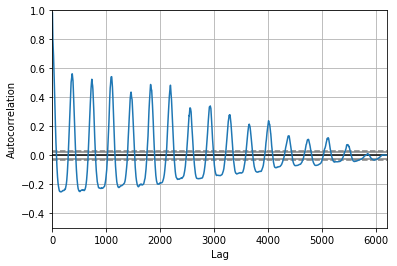

In [17]:
autocorrelation_plot(df['Q'])
plt.ylim(-0.5,1.0)
plt.show()